#Data Set
I have made the public link for the Extra Chess Dataset (No Label Version) available. You can download it using the following link: https://chula-my.sharepoint.com/:f:/g/personal/6570221521_student_chula_ac_th/EsRMAAs_k4RJqYxvnEtZjoEBopFHH5dDgKFVeQv-LKBa7A?e=qb90Q6

The label is created by 1701 (CM Student) You can following this link:

https://drive.google.com/drive/folders/1TKYA0-9tv1as3ARE1sNz_lktL02Xx8pF?usp=sharing

Update bug fixes Annotation: This version fixes for YOLO annotation. You can follow this link.  Cr. 1701

https://drive.google.com/drive/folders/1uTpXZtZdg6dN9H-0qvwLGH7ocIOKqWY9?usp=sharing

Additional Extra Chess Dataset (No Labels) Link:

https://chula-my.sharepoint.com/:f:/g/personal/6570221521_student_chula_ac_th/EsRMAAs_k4RJqYxvnEtZjoEBopFHH5dDgKFVeQv-LKBa7A?e=y5kbVe

Note:
For this dataset, please download it in batches of 100 images at a time to avoid issues during file extraction.


#Chess Board Detecction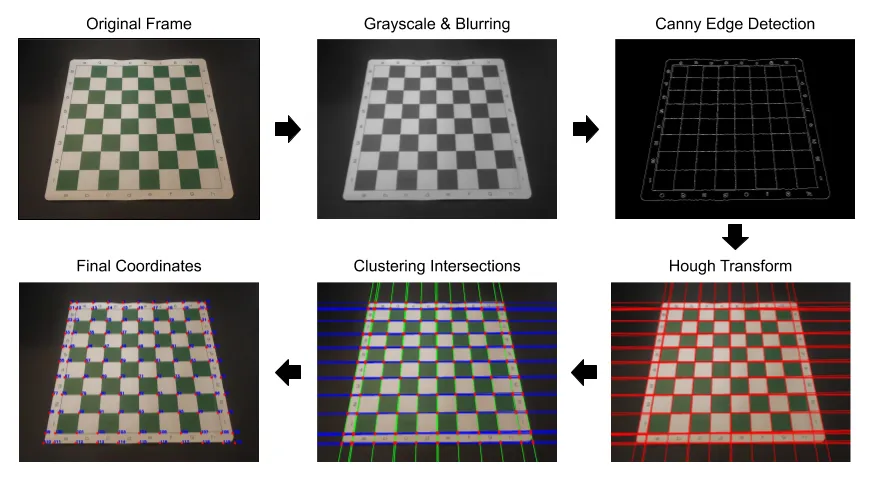

Pipeline

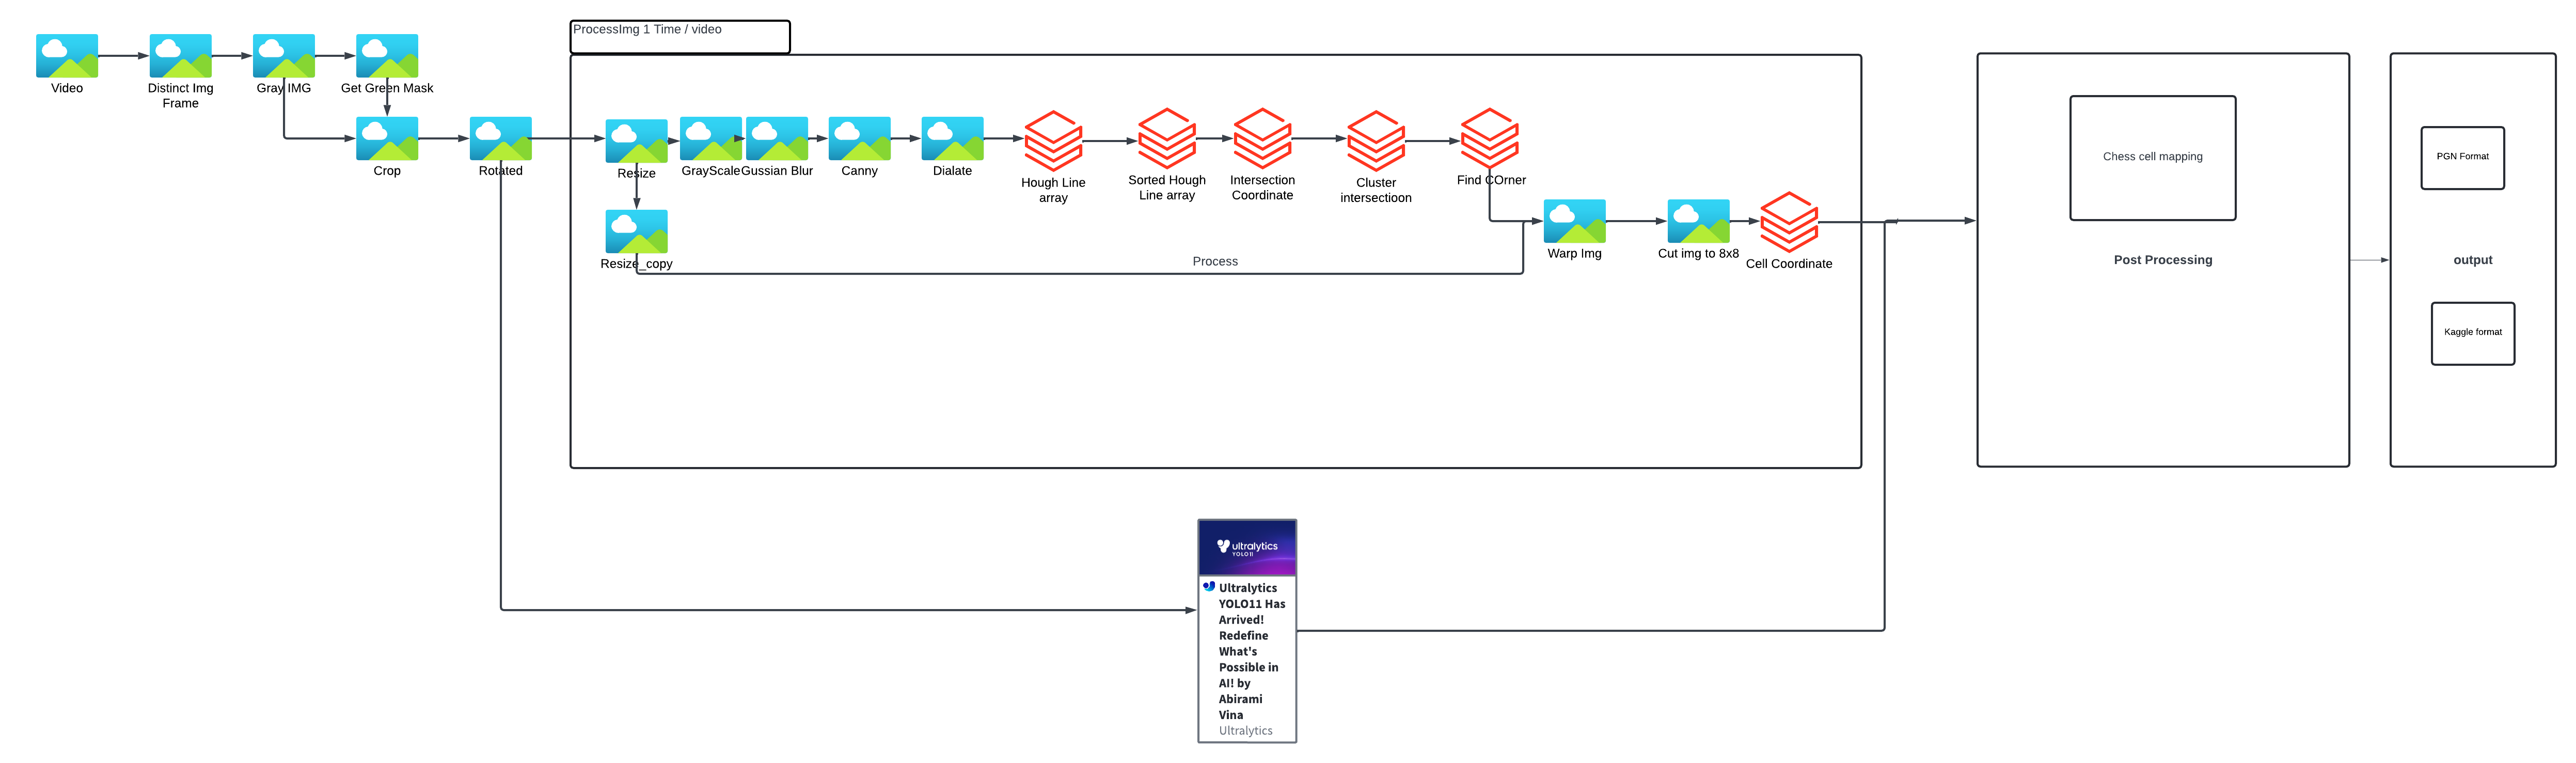

#Import Lib and file

In [1]:
!pip install python-chess svglib reportlab chess


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.9/913.9 kB 36.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 76.5 MB/s eta 0:00:00
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Created wheel for svglib: filename=svglib-1.5.1-py3-none-any.whl size=30907 sha256=006b4a7225b752015a97ee186069dc42f588c69b254bb892a145b0d4228d4e16
  Stored in directory: /home/jaf/.cache/pip/wheels/7e/01/0e/e6e336915d6e8448890a695770ba88fe030cc71060988016f6
  Created wheel for chess: filename=chess-1.11.1-py3-none-any.whl size=148497 sha256=3ef8e6c2f77c84dcc1bf293a88e6b3771fb64adcd9c830317ba4c2fe603f6086
  Stored in directory: /home/jaf/.cache/pip/wheels/f0/3f/76/8783033e8524d407e1bebaf72fdd3f3eba27e0c030e92bbd87
Successfully built svglib c

In [2]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.10 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
Setup complete ✅ (16 CPUs, 15.5 GB RAM, 101.9/1006.9 GB disk)


In [3]:
import matplotlib.pyplot as plt
import math
import operator
import sys
import pandas as pd
from collections import defaultdict

import numpy as np
import cv2

import scipy.spatial as spatial
import scipy.cluster as clstr

import heapq
import math
from sklearn.cluster import KMeans


import collections
import chess
import chess.pgn
import statistics
import IPython

ModuleNotFoundError: No module named 'sklearn'

#get Video

In [ ]:
# Step 1: Install Kaggle
!pip install kaggle --quiet

# Step 2: Upload kaggle.json
from google.colab import files
files.upload()  # Upload your kaggle.json file

# Step 3: Move kaggle.json to ~/.kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions

# Step 4: Verify installation and authentication
!kaggle datasets list

# Step 5: Download the dataset for 'cu-chess-detection'
!kaggle competitions download -c cu-chess-detection

# Step 6: Unzip the dataset
!unzip cu-chess-detection.zip -d cu-chess-detection


Saving kaggle.json to kaggle.json
ref                                                        title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
bhadramohit/customer-shopping-latest-trends-dataset        Customer Shopping (Latest Trends) Dataset     76KB  2024-11-23 15:26:12           9609        187  1.0              
hopesb/student-depression-dataset                          Student Depression Dataset.                  454KB  2024-11-22 17:56:03           6184         88  0.9411765        
mujtabamatin/air-quality-and-pollution-assessment          Air Quality and Pollution Assessment          84KB  2024-12-04 15:29:51           3202         58  1.0              
malaiarasugraj/global-health-statistics                    Global Health Statistics   

Hand Weight

In [ ]:
!gdown --remaining-ok 1cI_qBAs9dBYdtHSFE02wO0oSIfwJ04jJ

Downloading...
From: https://drive.google.com/uc?id=1cI_qBAs9dBYdtHSFE02wO0oSIfwJ04jJ
To: /content/Hand-yolo.pt
100% 5.55M/5.55M [00:00<00:00, 34.5MB/s]


Chess Weight

In [ ]:
# !gdown --remaining-ok 1L8N44JOfUsdqTeHDXX00210zlESf0Vzd
!gdown --remaining-ok 1TM_VQzVYkWXC0ApXUcsyFYpOJQPIrxqe #yoloo8 20epoch

Downloading...
From: https://drive.google.com/uc?id=1TM_VQzVYkWXC0ApXUcsyFYpOJQPIrxqe
To: /content/yolo8-20epoch.pt
100% 6.25M/6.25M [00:00<00:00, 42.7MB/s]


#Final PipeLine

Pre Process Func

In [ ]:
def getGreenMask(rgb_image):
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)  # Convert to HSV color space

    # Define the green color range in HSV
    lower_green = np.array([40, 20, 30])  # Lower bound of green
    upper_green = np.array([100, 255,200])  # Upper bound of green

    # Create a mask for green color
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    kernel = np.ones((20,20), np.uint8)
    green_mask_= cv2.morphologyEx(green_mask,cv2.MORPH_OPEN, kernel,10)
    green_mask= cv2.erode(green_mask, kernel,3)

    # Apply the mask to the original image
    green_detected = cv2.bitwise_and(rgb_image, rgb_image, mask=green_mask)

    return green_mask, green_detected


def GetCorner(binary_img):
    x_indices, y_indices = np.where(binary_img == 255)

    # # Get the min and max positions for x and y
    x_min, x_max = x_indices.min(), x_indices.max()
    y_min, y_max = y_indices.min(), y_indices.max()

    # print(f"Min X: {x_min}, Max X: {x_max}")
    # print(f"Min Y: {y_min}, Max Y: {y_max}")
    return x_min,y_min,x_max,y_max

def CropAndPadding(rgb_image, binary_image, padd,x_min,y_min,x_max,y_max):
    # plt.imshow(binary_image)
    # plt.show()
    st_crop = binary_image[x_min:x_max,y_min:y_max]
    # plt.imshow(st_crop)
    # plt.show()
    # print(x_min,y_min,x_max,y_max)

    w,h = rgb_image.shape[:2];
    x_min_padd = max(0, x_min-padd)
    x_max_padd = min(w, x_max+padd)
    y_min_padd = max(0, y_min-padd)
    y_max_padd = min(h, y_max+padd)

    # rgb_crop = rgb[x_min:x_max,y_min:y_max,:]
    rgb_crop = rgb_image[x_min_padd:x_max_padd,y_min_padd:y_max_padd,:]
    return rgb_crop

def rotateImageBasedOnBlackPiece(rgb_image):
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)  # Convert to HSV color space

    # Define the green color range in HSV
    lower_black = np.array([0, 0, 0])  # Lower bound of green
    upper_black = np.array([180, 50,100])  # Upper bound of green

    # Create a mask for green color
    black_mask = cv2.inRange(hsv, lower_black, upper_black)

    # kernel for cleaning mask
    close_kernel = np.ones((10,10), np.uint8)
    ero_kernel = np.ones((8,8), np.uint8)

    # cleaning mask
    black_mask = cv2.morphologyEx(black_mask,cv2.MORPH_CLOSE, close_kernel)
    black_mask= cv2.erode(black_mask, close_kernel,20)


    # Output
    output = cv2.connectedComponentsWithStats(black_mask, 8, cv2.CV_32S)

    num_count = output[0]-1
    stat = output[2]
    centroids = output[3]

    counts = [0,0,0,0] # down, right, up, left
    image_height = rgb_image.shape[0]
    image_width = rgb_image.shape[1]
    for i in range(len(centroids)):
        center_x, center_y = int(centroids[i][0]), int(centroids[i][1])
        if(center_y >= image_height/2):
            counts[0] += 1;
        else:
            counts[2] += 1;
        if(center_x >= image_width/2):
            counts[3] += 1;
        else:
            counts[1] += 1;

    m = np.argmax(counts)
    # print(f'rotation:{m}')
    return m
    # rotate_image = np.rot90(rgb_image, m) ## counter clock wise
    # # return green_mask, green_detected
    # return rotate_image;
class HandDetector:
    def __init__(self, model_path):
        self.model = YOLO(model_path)

    def IsFoundPerson(self, results):
        for det in results[0].boxes:
            cls = int(det.cls)
            if cls == 0:
                return True
        return False

    def predict(self, image):
        results = self.model.predict(image,verbose=False)
        return self.IsFoundPerson(results)  # Use self to call the instance method


In [ ]:
def show_image(img, title="Image"):
    """Display an image using matplotlib."""
    if len(img.shape) == 2:  # Grayscale image
        plt.imshow(img, cmap='gray')
    else:  # Color image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.title(title)
    # plt.axis('off')
    plt.show()


def canny(img):
    # Compute the median intensity of the already blurred image
    # Use Otsu's method to determine a global threshold
    otsu_threshold, _ = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Compute lower and upper thresholds for Canny
    lower_threshold = max(0, int(0.5 * otsu_threshold))
    upper_threshold = min(255, int(otsu_threshold))

    # Apply Canny edge detection
    edges = cv2.Canny(img, lower_threshold, upper_threshold)
    return edges



def hough_lines(img):
    rho, theta, thresh = 2, np.pi / 180, 600
    return cv2.HoughLines(img, rho, theta, thresh)


def sort_lines(lines):
    """
    Sorts lines by horizontal and vertical
    """
    h = []
    v = []
    for i in range(lines.shape[0]):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        if theta < np.pi / 4 or theta > np.pi - np.pi / 4:
            v.append([rho, theta])
        else:
            h.append([rho, theta])
    return h, v


def calculate_intersections(h, v):
    """
    Finds the intersection of two lines given in Hesse normal form.
    See https://stackoverflow.com/a/383527/5087436
    """
    points = []
    for rho1, theta1 in h:
        for rho2, theta2 in v:
            A = np.array([
                [np.cos(theta1), np.sin(theta1)],
                [np.cos(theta2), np.sin(theta2)]
            ])
            b = np.array([[rho1], [rho2]])
            point = np.linalg.solve(A, b)
            point = int(np.round(point[0])), int(np.round(point[1]))
            points.append(point)
    return np.array(points)


def cluster_intersections(points, max_dist=40):
    # I want to change this to kmeans
    Y = spatial.distance.pdist(points)
    Z = clstr.hierarchy.single(Y)
    T = clstr.hierarchy.fcluster(Z, max_dist, 'distance')
    clusters = defaultdict(list)
    for i in range(len(T)):
        clusters[T[i]].append(points[i])
    clusters = clusters.values()
    clusters = map(lambda arr: (np.mean(np.array(arr)[:, 0]), np.mean(np.array(arr)[:, 1])), clusters)

    result = []
    for point in clusters:
        result.append([point[0], point[1]])
    sorted_result = sorted(result, key=lambda pair: (pair[0], pair[1]))
    outlier_removal_result = filter_chessboard_coordinates(sorted_result)
    return outlier_removal_result


def find_chessboard_corners(points):
    """
    Code from https://medium.com/@neshpatel/solving-sudoku-part-ii-9a7019d196a2
    """
    # Bottom-right point has the largest (x + y) value
    # Top-left has point smallest (x + y) value
    # Bottom-left point has smallest (x - y) value
    # Top-right point has largest (x - y) value
    bottom_right, _ = max(enumerate([pt[0] + pt[1] for pt in points]), key=operator.itemgetter(1))
    top_left, _ = min(enumerate([pt[0] + pt[1] for pt in points]), key=operator.itemgetter(1))
    bottom_left, _ = min(enumerate([pt[0] - pt[1] for pt in points]), key=operator.itemgetter(1))
    top_right, _ = max(enumerate([pt[0] - pt[1] for pt in points]), key=operator.itemgetter(1))
    return [points[top_left], points[top_right], points[bottom_left], points[bottom_right]]


def distance_between(p1, p2):
    """
    Code from https://medium.com/@neshpatel/solving-sudoku-part-ii-9a7019d196a2
    """
    a = p2[0] - p1[0]
    b = p2[1] - p1[1]
    return np.sqrt((a ** 2) + (b ** 2))


def warp_image(img, edges):
    """
    Code from https://medium.com/@neshpatel/solving-sudoku-part-ii-9a7019d196a2
    """
    top_left, top_right, bottom_left, bottom_right = edges[0], edges[1], edges[2], edges[3]

    # Explicitly set the data type to float32 or 'getPerspectiveTransform' will throw an error
    warp_src = np.array([top_left, top_right, bottom_right, bottom_left], dtype='float32')

    side = max([
        distance_between(bottom_right, top_right),
        distance_between(top_left, bottom_left),
        distance_between(bottom_right, bottom_left),
        distance_between(top_left, top_right)
    ])

    # Describe a square with side of the calculated length, this is the new perspective we want to warp to
    warp_dst = np.array([[0, 0], [side - 1, 0], [side - 1, side - 1], [0, side - 1]], dtype='float32')

    # Gets the transformation matrix for skewing the image to fit a square by comparing the 4 before and after points
    m = cv2.getPerspectiveTransform(warp_src, warp_dst)
    # print(f'warped transform matrix: {m}')

    # Performs the transformation on the original image
    return cv2.warpPerspective(img, m, (int(side), int(side)))


def cut_chessboard(img, output_path, output_prefix=""):
    side_len = int(img.shape[0] / 8)
    for i in range(8):
        for j in range(8):
            tile = img[i * side_len: (i + 1) * side_len, j * side_len: (j + 1) * side_len]
            cv2.imwrite(output_path + output_prefix + "-" + str(j + i * 8) + ".jpg", tile)


def resize_image(img):
    """
    Resizes image to a maximum width of 800px
    """
    return cv2.resize(img, (800, 800))
    # else:
    #     return img
def save_clustered_to_csv(clustered, filename="clustered_intersections.csv"):
    # Convert clustered data into a DataFrame
    df = pd.DataFrame(clustered, columns=["x", "y"])
    # Save DataFrame to a CSV file
    df.to_csv(filename, index=False)
    print(f"Clustered intersections saved to {filename}")


def render_lines(img, lines, color):
    for rho, theta in lines:
        a = math.cos(theta)
        b = math.sin(theta)
        x0, y0 = a * rho, b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * a))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * a))
        cv2.line(img, pt1, pt2, color, 1, cv2.LINE_AA)


def render_intersections(img, points, color, size):
    for point in points:
        cv2.circle(img, (int(point[0]), int(point[1])), 2, color, size)

def find_3_closest(clustered):
    # Find the reference point
    ref_point = min(clustered, key=lambda pair: (pair[0], -pair[1]))

    # Helper function to calculate Euclidean distance
    def distance(point):
        return math.sqrt((point[0] - ref_point[0])**2 + (point[1] - ref_point[1])**2)

    # Filter out the reference point and find the 3 closest points
    filtered_points = [point for point in clustered if point != ref_point]
    closest_points = heapq.nsmallest(3, filtered_points, key=distance)

    return ref_point, closest_points
def filter_chessboard_coordinates(coordinates):
    """
    Filters the given chessboard intersection points to ensure there are exactly 81 points.

    Args:
        coordinates (list of list): A list of [x, y] coordinates.

    Returns:
        list of list: A filtered list of 81 coordinates as [x, y].
    """
    filtered_coordinates = coordinates

    if len(coordinates) > 81:
      coordinates = np.array(coordinates)  # Convert input coordinates to a numpy array

      # Perform K-means clustering to group points into 81 clusters
      kmeans = KMeans(n_clusters=81, random_state=42)
      kmeans.fit(coordinates)
      cluster_centers = kmeans.cluster_centers_

      # Convert the cluster centers to rounded coordinates and return as a list of lists
      filtered_coordinates = np.round(cluster_centers, decimals=2).tolist()

    return filtered_coordinates



In [ ]:

def process_chessboard(src, debug=False):
    # src = cv2.imread(src_path)

    # if src is None:
    #     sys.exit("There is no file with this path!")

    # src = resize_image(src)
    # src_copy = src.copy()

    # # Convert to grayscale
    # process = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    src = src
    src_copy = src.copy()
    process = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

    if debug:
        show_image(src_copy, title=f'src img{src_copy.shape}')
        show_image(process, title=f'gray process imgae{process.shape}')
        # cv2.imwrite('grayscale.png', process)

    # Blur to remove disturbing things
    # process = cv2.blur(process, (4, 4))
    #process = cv2.medianBlur(process, 5)
    process = cv2.GaussianBlur(process, (5, 5), 0) #GaussianBlur give a better result


    if debug:
        show_image(process, title=f'blur process imgae{process.shape}')

        # cv2.imwrite('blur.png', process)

    # Use Canny Edge Detector
    process = canny(process)

    if debug:
        show_image(process, title=f'canny process imgae{process.shape}')
        # cv2.imwrite('canny.png', process)

    # Dilate image (thicker lines)
    process = cv2.dilate(process, np.ones((3, 3), dtype=np.uint8))

    if debug:
        show_image(process, title=f'dialate process imgae{process.shape}')
        # cv2.imwrite('dilate.png', process)

    # Use Hough transform to detect lines
    lines = hough_lines(process)

    # Sort lines by horizontal and vertical
    h, v = sort_lines(lines)

    if debug:
        render_lines(src_copy, h, (0, 255, 0))
        render_lines(src_copy, v, (0, 0, 255))
        show_image(src_copy, title="Sorted Lines")
        # cv2.imwrite('sorted-lines.png', src_copy)

    if len(h) < 9 or len(v) < 9:
        print("There are not enough horizontal and vertical lines in this image. Try it anyway!")

    # Calculate intersections of the horizontal and vertical lines
    intersections = calculate_intersections(h, v)

    if debug:
        render_intersections(src_copy, intersections, (255, 0, 0), 1)
        show_image(src_copy, title="Intersections")
        # cv2.imwrite('intersections.png', src_copy)

    # Cluster intersection since there are many
    clustered = cluster_intersections(intersections)
    # filtered_clustered = filter_chessboard_coordinates(clustered)

    if debug:
        src_copy = src.copy()
        render_intersections(src_copy, clustered, (255, 0, 0), 5)
        show_image(src_copy, title="Clustered Intersections")
        print(clustered)
        save_clustered_to_csv(clustered)
        result = min(clustered, key=lambda pair: (pair[0], -pair[1]))
        if result:
          print(f'corner: {result}')
          # print(find_3_closest(clustered))
          # results2 = is_black_or_white_with_visualization(src_path, find_3_closest(clustered), 10, 128)
          # print(results2)


        # cv2.imwrite('clustered-intersections.png', src_copy)

    if len(clustered) != 81:
        print("Something is wrong. There are " + str(len(intersections)) + " instead of 81 intersections.")

    # Find outer corners of sas chessboard
    corners = find_chessboard_corners(clustered)

    if debug:
        src_copy = src.copy()
        render_intersections(src_copy, corners, (255, 0, 0), 5)
        show_image(src_copy, title="Corners")
        # cv2.imwrite('corners.png', src_copy)

    # Warp and crop image
    # dst = warp_image(src, corners)
    # dst = resize_image(dst)
    return corners,clustered

    if debug:
        show_image(dst, title=f'warped process imgae{dst.shape}')
        # cv2.imwrite('warped.png', dst)

    # Cut chessboard into 64 tiles
    # cut_chessboard(dst, output_path, output_prefix)



In [ ]:
from ultralytics import YOLO
class YOLOPredictor:
    def __init__(self, model_path):
        """
        Initialize the YOLO model.

        :param model_path: Path to the trained YOLO model.
        """
        self.model = YOLO(model_path)
        # self.class_names = [
        #     "white-queen",
        #     "white-pawn",
        #     "black-rook",
        #     "black-bishop",
        #     "black-knight",
        #     "black-queen",
        #     "black-pawn",
        #     "black-king",
        #     "white-rook",
        #     "white-bishop",
        #     "white-knight",
        #     "white-king",
        # ]
        self.class_names = [
            "black-bishop",
            "black-king",
            "black-knight",
            "black-pawn",
            "black-queen",
            "black-rook",
            "white-bishop",
            "white-king",
            "white-knight",
            "white-pawn",
            "white-queen",
            "white-rook",
        ]
    def predict(self, image_path):
        """
        Predict bounding boxes for the given image and return in the specified format.

        :param image_path: Path to the image for prediction.
        :return: List of bounding boxes in the format [class_number, class_name, x, y, width, height, conf]
        """
        results = self.model.predict(image_path)
        bbox_list = []

        for result in results:
            # Get image dimensions
            w, h, _ = result.orig_img.shape

            # Iterate through detections in each result
            for det in result.boxes:
                # Get normalized xywh (YOLO format) and class confidence
                x_center, y_center, width, height = det.xywhn[0]
                conf = det.conf.item()  # Convert the tensor to a float value
                cls = int(det.cls)  # Class number

                # Denormalize to pixel values
                x_center_pixel = int(x_center * w)
                y_center_pixel = int(y_center * h)
                width_pixel = int(width * w)
                height_pixel = int(height * h)

                # Calculate starting point (top-left corner) of the bounding box
                x = int(x_center_pixel - width_pixel / 2)
                y = int(y_center_pixel - height_pixel / 2)

                # Get class name from class_names
                class_name = self.class_names[cls]

                # Append to the list in the format [class_number, class_name, x, y, width, height, conf]
                bbox_list.append([cls, class_name, x, y, width_pixel, height_pixel, conf])

        return bbox_list


def objectDetection(img_path,model_path):

  predictor = YOLOPredictor(model_path)
  predictor.conf = 0.50
  bbox_list = predictor.predict(img_path)
  return bbox_list






In [ ]:
def printBoundingBox(bbox_list, count):
    print(f'==========================={count}======================================')

    # result = []
    # for classNumber, className, x, y, w, h, conf in bbox_list:
    #     result.append([className,classNumber, x, y, w, h, conf])

    # # Print the entire list in the desired format
    # print(result)
    for classNumber, className, x, y, w, h, conf in bbox_list:
      print(f'{className} {conf}')
    # return result


In [ ]:
# def save_image_and_write_txt(image, filename, data_list):
#     """
#     Save an image to a file and write a list to a .txt file with the same name.

#     Parameters:
#         image (numpy.ndarray): The image to save (in OpenCV format).
#         filename (str): The base name for the image and text files (e.g., "output_image").
#         data_list (list of lists): A list of lists to write into the .txt file.
#     """
#     # Save the image
#     image_filename = f"/content/Output/{filename}.jpg"
#     txt_filename = f"/content/Output/{filename}.txt"

#     # Write the image to disk
#     cv2.imwrite(image_filename, image)
#     print(f"Image saved as {image_filename}")

#     # Write the data to a .txt file
#     with open(txt_filename, 'w') as file:
#         for item in data_list:
#             file.write(f"{item}\n")
#     print(f"Text file saved as {txt_filename}")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_bounding_boxes(warped_resize_rotated_image, boundingBox):
    """
    Plots bounding boxes on a given image.

    Parameters:
    - warped_resize_rotated_image: np.ndarray
        The image on which to draw the bounding boxes.
    - boundingBox: list of lists
        Each inner list contains [cls, class_name, x, y, width_pixel, height_pixel, conf].
    """
    # Plot the image
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(warped_resize_rotated_image)

    # Plot bounding boxes
    for bbox in boundingBox:
        _, class_name, x, y, width, height, conf = bbox

        # Create a rectangle patch
        rect = patches.Rectangle(
            (x, y), width, height,
            linewidth=2, edgecolor='r', facecolor='none'
        )
        # Add the patch to the Axes
        ax.add_patch(rect)

        # Add label text
        label = f"{class_name} ({conf:.2f})"
        ax.text(
            x, y - 5, label,
            color='white', fontsize=12,
            bbox=dict(facecolor='red', alpha=0.5, edgecolor='none')
        )

    # Hide axis for better visualization
    plt.axis('off')
    plt.show()

# **Post process**

In [ ]:
# PIECE_MAP = {
#     0: "Q", 1: "P", 2: "r", 3: "b", 4: "n", 5: "q",
#     6: "p", 7: "k", 8: "R", 9: "B", 10: "N", 11: "K",
# }
PIECE_MAP = {
    0: "b", 1: "k", 2: "n", 3: "p", 4: "q", 5: "r",
    6: "B", 7: "K", 8: "N", 9: "P", 10: "Q", 11: "R",
}
def detection_to_chess_coordinates(objects):
    # Constants
    CELL_SIZE = 100
    GRID_SIZE = 8  # 8x8 chessboard

    result = []
    square_conf = dict()

    for obj in objects:
        class_no,class_name ,  x, y, w, h, confidence = obj
        # Calculate the top of the chess piece
        bottom_y = y + (h * 0.75)
        right_x = x + (w * 0.5)

        # Calculate the cell (i, j)
        i = min(max(int(bottom_y // CELL_SIZE), 0), GRID_SIZE - 1)  # Ensure i is within [0, 7]
        j = min(max(int(right_x // CELL_SIZE), 0), GRID_SIZE - 1)      # Ensure j is within [0, 7]

        # Append the result
        if((i,j) not in square_conf or square_conf[(i,j)] < confidence):
          result.append([class_no, i, j])
          square_conf[(i,j)] = confidence

    return result

def create_board(chess_coordinates):
    board = chess.Board()
    board.clear()  # Clear the default starting position

    # Place pieces based on the coordinates
    for class_no, i, j in chess_coordinates:
        piece = chess.Piece.from_symbol(PIECE_MAP[class_no])
        square = chess.square(7 - j, i)  # Convert (i, j) to a chess square
        board.set_piece_at(square, piece)

    return board


def boards_to_pgn_move(prev_board, next_board, override_turn = False, override_rule = False):
    # Detect the move by comparing squares
    move = None

    start_list = collections.deque()
    destination_list = []
    move_count = 0
    for square in chess.SQUARES:
        prev_piece = prev_board.piece_at(square)
        next_piece = next_board.piece_at(square)
        if prev_piece != next_piece:
            # print(prev_piece, next_piece)
            move_count += 1
            if prev_piece and next_piece == None:  # Piece moved from this square
                if(prev_piece.piece_type == chess.KING):
                    start_list.appendleft((prev_piece,square))
                else:
                    start_list.append((prev_piece,square))
            elif next_piece:  # Piece moved to this square
                if(prev_piece == None): # Move
                    destination_list.append((next_piece,square,False))
                elif(prev_piece.color != next_piece.color): # Capture
                    destination_list.append((next_piece,square,True))

    is_move = False
    out = ""
    misc = []
    for piece_from, pos_from in start_list:
        for piece_to, pos_to,is_capture in destination_list:
            if(piece_from == piece_to):
                move = chess.Move(pos_from, pos_to)
                misc = [piece_from.color]
                # print(prev_board.legal_moves)
                print(piece_from, pos_from, pos_to)
                if(override_turn):
                    prev_board.turn = piece_from.color

                # Check for castling
                if prev_board.is_kingside_castling(move):
                    is_move = True
                    out = "O-O"
                    return is_move, out, misc
                elif prev_board.is_queenside_castling(move):
                    is_move = True
                    out = "O-O-O"
                    return is_move, out, misc

                # if(prev_board.is_pseudo_legal(move)):
                if(prev_board.is_legal(move) or override_rule):
                    game = chess.pgn.Game()
                    game.setup(prev_board)
                    game.add_main_variation(move)
                    is_move = True
                    out = str(game.variation(0)).split()[1]
                    return is_move, out, misc

    return is_move, out, misc

class StableBoard:

    def __init__(self, board):
        self.boards = []
        self.square_pieces = [[[] for j in range(8)] for i in range(8)]
        self.add_board(board)

    def add_board(self, board):
        self.boards.append(board)
        for i in range(8):
            for j in range(8):
                square = chess.square(i,j)
                piece = board.piece_at(square)
                if (piece != None):
                    symbol = board.piece_at(square).symbol()
                    self.square_pieces[i][j].append(symbol)

    def get_stable_board(self):
        board = chess.Board()
        board.clear()  # Clear the default starting position
        for i in range(8):
            for j in range(8):
                square = chess.square(i,j)
                symbols = self.square_pieces[i][j]
                if (len(symbols) != 0):
                    symbol = statistics.mode(symbols)
                    piece = chess.Piece.from_symbol(symbol)
                    board.set_piece_at(square, piece)
        return board

    def get_stable_board_head(self):
        board = chess.Board()
        board.clear()  # Clear the default starting position
        for i in range(8):
            for j in range(8):
                square = chess.square(i,j)
                symbols = self.square_pieces[i][j][:20]
                if (len(symbols) != 0):
                    symbol = statistics.mode(symbols)
                    piece = chess.Piece.from_symbol(symbol)
                    board.set_piece_at(square, piece)
        return board

    def get_stable_board_tail(self):
        board = chess.Board()
        board.clear()  # Clear the default starting position
        for i in range(8):
            for j in range(8):
                square = chess.square(i,j)
                symbols = self.square_pieces[i][j][-20:]
                if (len(symbols) != 0):
                    symbol = statistics.mode(symbols)
                    piece = chess.Piece.from_symbol(symbol)
                    board.set_piece_at(square, piece)
        return board



def frames_to_pgn_movelist(frames):
    boards = []
    hand_flags = []

    for frame, after_hand in frames:
        chess_coordinates = detection_to_chess_coordinates(frame)
        boards.append(create_board(chess_coordinates))
        hand_flags.append(after_hand)

    print("start detect moves")
    step = 0
    last_valid_board = None
    stable_boards = []
    for i in range(len(boards)):
        board = boards[i]
        after_hand = hand_flags[i]

        if step == 0:
            stable = StableBoard(board)
            last_valid_board = board
            step = 1
        else:
            is_move, pgn_move, misc = boards_to_pgn_move(last_valid_board, board, override_turn=True,override_rule=True)
            last_valid_board = board

            if(is_move or after_hand):
                stable_boards.append(stable)
                stable = StableBoard(board)
            else:
                stable.add_board(board)

    stable_boards.append(stable)

    print("start printing moves")
    pgn_movelist = ""
    step = 0
    game_turn = 1
    for i in range(len(stable_boards)-1):
        # prev = stable_boards[i].get_stable_board_tail()
        prev = stable_boards[i].get_stable_board_head()
        next = stable_boards[i+1].get_stable_board_head()
        is_move, pgn_move, misc = boards_to_pgn_move(prev, next, override_turn=True,override_rule=True)

        if(is_move):
            html_code = chess.svg.board(prev, size=200)
            display(IPython.display.HTML(html_code))
            html_code = chess.svg.board(next, size=200)
            display(IPython.display.HTML(html_code))
            # display(chess.svg.board(board, size=200))
            if(step % 2 == 0):
                if(step == 0 and misc == [chess.BLACK]):
                    pgn_movelist += str(game_turn) + "... " + pgn_move + " "
                    step += 1
                else:
                    pgn_movelist += str(game_turn) + ". " + pgn_move + " "
                game_turn += 1
            else:
                pgn_movelist += pgn_move + " "
            step += 1


    return pgn_movelist

def post_process_pipeline(clip_name, frames):
    # clip_name = name of clip (string)
    # frames = list of frame
    # frame = list of objects (chess piece that is detected in the frame)
    # object = [class_number, x, y, width, height]
    # x = middle of object horizontal position
    # y = middle of object vertical position
    # assumptions: image size = 800 px --> x 0-100 = chess column 1
        # Class number definitions:
        #     "0: white-queen",
        #     "1: white-pawn",
        #     "2: black-rook",
        #     "3: black-bishop",
        #     "4: black-knight",
        #     "5: black-queen",
        #     "6: black-pawn",
        #     "7: black-king",
        #     "8: white-rook",
        #     "9: white-bishop",
        #     "10: white-knight",
        #     "11: white-king",

    pgn_movelist = frames_to_pgn_movelist(frames)
    output = [clip_name, pgn_movelist]
    return output
def export_csv_result(list_of_output):
    # output = output from post_process_pipeline for each clip

    df = pd.DataFrame(list_of_output, columns=["row_id", "output"])
    # df.to_csv("./kaggle/working/submission.csv", index = False, header = True)
    df.to_csv("submission.csv", index = False, header = True)

#Final Function

In [ ]:
def process_video(video_path,frame_per_second,chess_model_path,hand_model_path,Debug,padding=55):
    """
    Processes a video to extract and analyze frames at specific intervals.

    Parameters:
    - video_path (str): Path to the video file.
    - frame_per_second (int): Number of frames to skip before processing the next one.
    """
    video = cv2.VideoCapture(video_path)
    success = True
    count = 0
    prev_gray = None
    x_min, y_min, x_max, y_max = None, None, None, None
    rotation_default = None
    handDetector = HandDetector(hand_model_path)
    bbox_of_each_video = []
    frame_after_hand = 0
    frame_after_hand_th = 2
    after_hand = False

    while success:
        success, frame = video.read()
        if not success:
            break

        if count % frame_per_second == 0:
            isFoundHuman = handDetector.predict(frame)
            isPass=False
            after_hand = False
            if(count != 0):
                if(isFoundHuman):
                    frame_after_hand = 0
                if(prev_isFoundHuman and not isFoundHuman):
                    frame_after_hand = 1

                if(frame_after_hand >= frame_after_hand_th):
                    isPass=True
                    after_hand = frame_after_hand == frame_after_hand_th
                frame_after_hand += 1


            else:
                isPass = True

            if(isPass):
                rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                if count == 0:
                    # Initialize cropping values from the first frame
                    mask, result_rgb = getGreenMask(rgb.copy())
                    x_min, y_min, x_max, y_max = GetCorner(mask)
                    rotation_default = rotateImageBasedOnBlackPiece(rgb)
                    print("Default values initialized for cropping and rotation.")

                mask, _ = getGreenMask(rgb.copy())
                rgb_crop = CropAndPadding(rgb, mask, padding, x_min, y_min, x_max, y_max)
                if Debug:
                    plt.imshow(rgb_crop)
                    plt.title(f'rcrop: {count}')
                    plt.show()

                if count == 0:
                  corners,coordinate=process_chessboard(rgb_crop, debug=Debug)
                warped = warp_image(rgb_crop, corners)
                warped_resize = resize_image(warped)
                warped_resize_rotated = np.rot90(warped_resize, rotation_default)
                if Debug:
                  show_image(warped_resize_rotated, "model input img")
                boundingBox = objectDetection( warped_resize_rotated  ,chess_model_path)
                if Debug:
                  printBoundingBox(boundingBox,count) #get input from here to preprocessing process
                  plot_bounding_boxes(warped_resize_rotated ,boundingBox)
                bbox_of_each_video.append([boundingBox,after_hand])

            prev_frame = frame
            prev_isFoundHuman = isFoundHuman
        count += 1
    return bbox_of_each_video

##submission code

In [ ]:
csv_output=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
      if filename.endswith(".mp4"):
        file_path = os.path.join(dirname, filename)
        bbox_of_each_video = process_video(file_path,frame_per_second=90,chess_model_path='/content/best-v8-copy.pt',hand_model_path='/content/Hand-yolo.pt',Debug=False)
        csv_output.append(post_process_pipeline(filename,bbox_of_each_video))
export_csv_result(csv_output)


This is not submission code

In [ ]:
file_path_list=['/content/cu-chess-detection/Chess Detection Competition/test_videos/2_Move_rotate_student.mp4','/content/cu-chess-detection/Chess Detection Competition/test_videos/2_move_student.mp4','/content/cu-chess-detection/Chess Detection Competition/test_videos/4_Move_studet.mp4',
                '/content/cu-chess-detection/Chess Detection Competition/test_videos/6_Move_student.mp4','/content/cu-chess-detection/Chess Detection Competition/test_videos/8_Move_student.mp4','/content/cu-chess-detection/Chess Detection Competition/bonus_video/(Bonus)Long_video_student.mp4']
csv_output=[]
for file_path in file_path_list:
  # file_path='/content/6_Move_student.mp4'
  filename = file_path.split('/')[-1]
  # filename= '6_Move_student.mp4'
  print(filename)
  bbox_of_each_video = process_video(file_path,frame_per_second=90,chess_model_path='/content/yolo8-20epoch.pt',hand_model_path='/content/Hand-yolo.pt',Debug=False,padding=45)
  output = post_process_pipeline(filename,bbox_of_each_video)
  print(output)
  csv_output.append(output)
  print(f'DOne for {filename}')
export_csv_result(csv_output)



2_Move_rotate_student.mp4
Default values initialized for cropping and rotation.

0: 640x640 2 black-bishops, 1 black-king, 2 black-knights, 8 black-pawns, 1 black-queen, 1 white-king, 2 white-knights, 10 white-pawns, 7.7ms
Speed: 8.6ms preprocess, 7.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


<ipython-input-10-64a7f123e1a9>:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  point = int(np.round(point[0])), int(np.round(point[1]))



0: 640x640 2 black-bishops, 1 black-king, 2 black-knights, 7 black-pawns, 1 black-queen, 1 black-rook, 3 white-bishops, 1 white-king, 2 white-knights, 9 white-pawns, 1 white-rook, 7.4ms
Speed: 8.3ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 black-bishops, 1 black-king, 2 black-knights, 7 black-pawns, 1 black-queen, 1 black-rook, 2 white-bishops, 1 white-king, 2 white-knights, 9 white-pawns, 1 white-rook, 7.4ms
Speed: 10.0ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 black-bishops, 1 black-king, 2 black-knights, 7 black-pawns, 1 black-queen, 1 black-rook, 3 white-bishops, 1 white-king, 2 white-knights, 9 white-pawns, 1 white-rook, 7.4ms
Speed: 8.2ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 black-bishops, 1 black-king, 2 black-knights, 7 black-pawns, 1 black-queen, 1 black-rook, 2 white-bishops, 1 white-king, 2 white-knights

P 14 22


['2_Move_rotate_student.mp4', '1... Qh4+ 2. g3 ']
DOne for 2_Move_rotate_student.mp4
2_move_student.mp4
Default values initialized for cropping and rotation.



<ipython-input-10-64a7f123e1a9>:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  point = int(np.round(point[0])), int(np.round(point[1]))


0: 640x640 2 black-bishops, 1 black-king, 2 black-knights, 8 black-pawns, 1 black-queen, 1 black-rook, 1 white-bishop, 1 white-king, 2 white-knights, 8 white-pawns, 2 white-rooks, 8.9ms
Speed: 3.7ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 black-bishops, 1 black-king, 2 black-knights, 7 black-pawns, 1 black-queen, 1 black-rook, 1 white-bishop, 1 white-king, 2 white-knights, 8 white-pawns, 2 white-rooks, 7.4ms
Speed: 2.7ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 black-bishops, 2 black-knights, 7 black-pawns, 1 black-queen, 1 black-rook, 1 white-bishop, 1 white-king, 3 white-knights, 8 white-pawns, 2 white-rooks, 9.9ms
Speed: 4.2ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 black-bishops, 2 black-knights, 7 black-pawns, 1 black-queen, 1 black-rook, 1 white-bishop, 1 white-king, 2 white-knights, 8 white-pawns, 1 white-queen,

['2_move_student.mp4', '1. g3 ']
DOne for 2_move_student.mp4
4_Move_studet.mp4
Default values initialized for cropping and rotation.

0: 640x640 3 black-bishops, 1 black-king, 2 black-knights, 11 black-pawns, 1 black-queen, 1 black-rook, 2 white-bishops, 2 white-knights, 10 white-pawns, 1 white-queen, 1 white-rook, 7.4ms
Speed: 2.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


<ipython-input-10-64a7f123e1a9>:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  point = int(np.round(point[0])), int(np.round(point[1]))



0: 640x640 2 black-bishops, 1 black-king, 2 black-knights, 11 black-pawns, 2 black-queens, 1 black-rook, 3 white-bishops, 2 white-knights, 10 white-pawns, 1 white-queen, 1 white-rook, 7.4ms
Speed: 4.2ms preprocess, 7.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 black-bishops, 1 black-king, 2 black-knights, 11 black-pawns, 1 black-queen, 1 black-rook, 3 white-bishops, 2 white-knights, 10 white-pawns, 1 white-queen, 1 white-rook, 13.1ms
Speed: 4.1ms preprocess, 13.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 black-bishops, 1 black-king, 2 black-knights, 11 black-pawns, 1 black-queen, 1 black-rook, 2 white-bishops, 2 white-knights, 10 white-pawns, 1 white-queen, 1 white-rook, 7.4ms
Speed: 2.6ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 black-bishops, 1 black-king, 2 black-knights, 11 black-pawns, 2 black-queens, 1 black-rook, 3 white-bishops, 2 white-knights,

N 31 46


p 29 22


N 46 63


['4_Move_studet.mp4', '1... f4 2. Ng6 fxg3 3. Nxh8 ']
DOne for 4_Move_studet.mp4
6_Move_student.mp4
Default values initialized for cropping and rotation.

0: 640x640 2 black-bishops, 1 black-knight, 9 black-pawns, 2 white-bishops, 1 white-knight, 7 white-pawns, 2 white-rooks, 7.4ms
Speed: 2.6ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


<ipython-input-10-64a7f123e1a9>:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  point = int(np.round(point[0])), int(np.round(point[1]))



0: 640x640 2 black-bishops, 1 black-knight, 9 black-pawns, 2 white-bishops, 7 white-pawns, 1 white-queen, 2 white-rooks, 7.4ms
Speed: 4.1ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 black-bishop, 1 black-knight, 9 black-pawns, 2 white-bishops, 1 white-king, 7 white-pawns, 1 white-queen, 2 white-rooks, 9.6ms
Speed: 3.6ms preprocess, 9.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 black-bishop, 1 black-knight, 9 black-pawns, 2 white-bishops, 1 white-king, 7 white-pawns, 1 white-queen, 2 white-rooks, 9.7ms
Speed: 3.9ms preprocess, 9.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 black-bishop, 1 black-knight, 9 black-pawns, 2 white-bishops, 1 white-king, 7 white-pawns, 1 white-queen, 2 white-rooks, 7.4ms
Speed: 2.6ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 black-bishop, 1 black-knight, 9 black-pawns, 2 whit

R 1 33


p 49 41


P 10 26


n 62 52


R 33 9


['6_Move_student.mp4', '1... Bxb5 2. Rxb5 b6 3. c4 Ne7 4. Rb2 ']
DOne for 6_Move_student.mp4
8_Move_student.mp4
Default values initialized for cropping and rotation.



<ipython-input-10-64a7f123e1a9>:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  point = int(np.round(point[0])), int(np.round(point[1]))


0: 640x640 2 black-bishops, 1 black-knight, 8 black-pawns, 2 white-bishops, 7 white-pawns, 1 white-queen, 2 white-rooks, 9.7ms
Speed: 6.7ms preprocess, 9.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 black-bishops, 1 black-knight, 8 black-pawns, 1 black-rook, 2 white-bishops, 7 white-pawns, 1 white-queen, 2 white-rooks, 7.8ms
Speed: 4.1ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 black-bishops, 1 black-knight, 8 black-pawns, 1 black-rook, 2 white-bishops, 7 white-pawns, 1 white-queen, 2 white-rooks, 8.5ms
Speed: 3.8ms preprocess, 8.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 black-bishops, 1 black-king, 1 black-knight, 8 black-pawns, 1 black-rook, 2 white-bishops, 7 white-pawns, 1 white-queen, 2 white-rooks, 12.1ms
Speed: 4.1ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 black-bishops, 1 black-king, 1 bl

k 60 59


p 50 42


B 53 4


Q 13 48


r 57 58


R 9 25


n 52 42


Q 48 41


['8_Move_student.mp4', '1. Qe6 Kd8 2. c6 Be1 3. Qxa7 Rc8 4. Rxb4 Nc6 5. Qb6+ ']
DOne for 8_Move_student.mp4
(Bonus)Long_video_student.mp4
Default values initialized for cropping and rotation.


<ipython-input-10-64a7f123e1a9>:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  point = int(np.round(point[0])), int(np.round(point[1]))



0: 640x640 2 black-bishops, 1 black-king, 2 black-knights, 9 black-pawns, 2 black-queens, 1 black-rook, 3 white-bishops, 1 white-king, 1 white-knight, 9 white-pawns, 2 white-rooks, 7.9ms
Speed: 4.1ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 black-bishops, 1 black-king, 2 black-knights, 9 black-pawns, 1 black-queen, 1 black-rook, 2 white-bishops, 1 white-king, 2 white-knights, 9 white-pawns, 2 white-rooks, 8.4ms
Speed: 4.1ms preprocess, 8.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 black-bishops, 1 black-king, 2 black-knights, 9 black-pawns, 2 black-queens, 1 black-rook, 1 white-bishop, 1 white-king, 2 white-knights, 9 white-pawns, 1 white-rook, 10.1ms
Speed: 4.5ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 black-bishops, 1 black-king, 2 black-knights, 9 black-pawns, 1 black-queen, 1 black-rook, 1 white-bishop, 1 white-king, 9 white-pawns

N 1 18


n 57 42


N 18 35


p 52 44


N 35 20


N 21 31


n 62 47


N 31 37


n 47 37


N 20 37


p 44 37


r 56 59


R 27 36


R 36 37


k 51 42


p 54 38


P 29 38


P 10 18


['(Bonus)Long_video_student.mp4', '1. f4 Nc3 2. Nc6 Nxd5 3. e6 Ne3 4. Nxh4 Nh6 5. Nhxf5 Nxf5 6. Nxf5 exf5 7. Rd8 Re5 8. Rxf5 Kc6 9. g5 fxg5 10. c3 ']
DOne for (Bonus)Long_video_student.mp4


## Sand Box area

Min X: 550, Max X: 1376
Min Y: 73, Max Y: 988
rotation:0
Default values initialized for cropping and rotation.


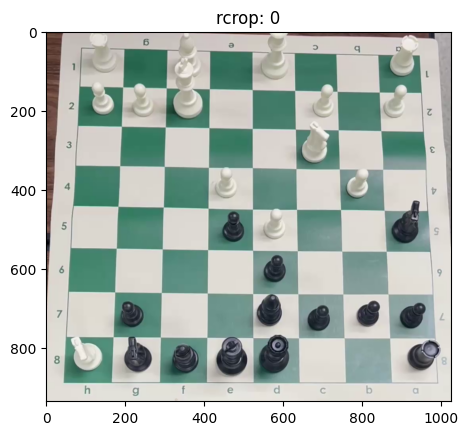

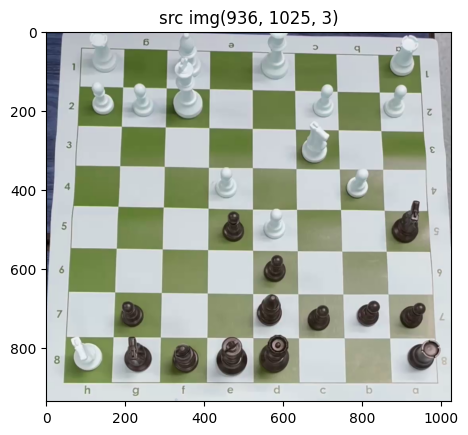

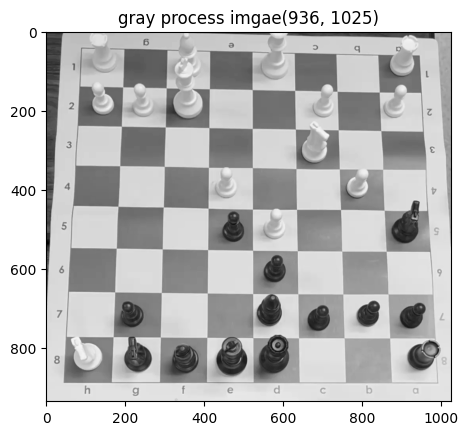

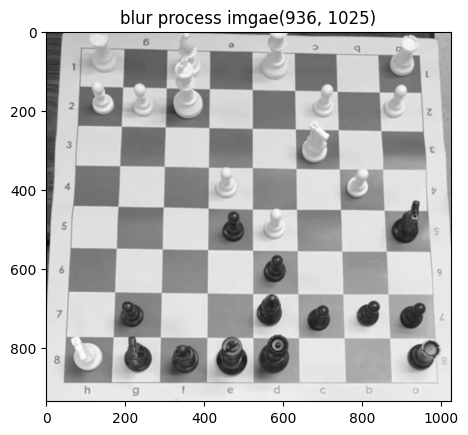

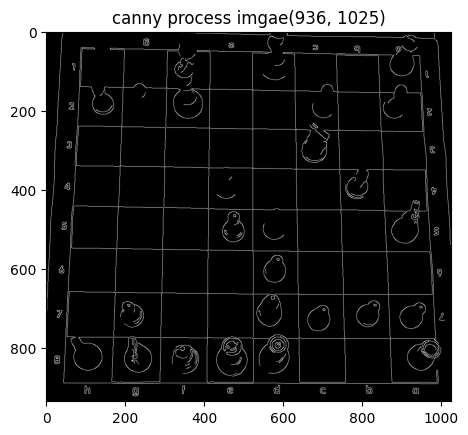

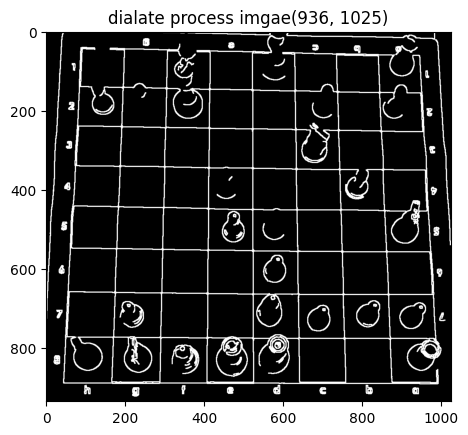

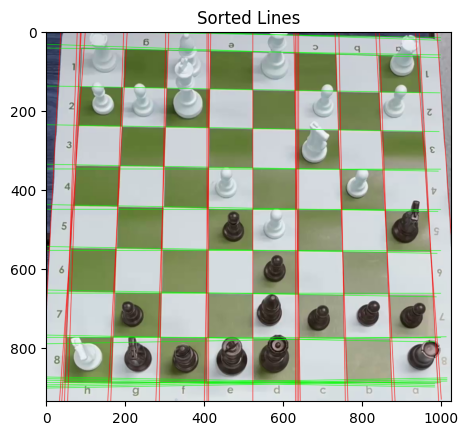

<ipython-input-199-98efe2ff40e5>:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  point = int(np.round(point[0])), int(np.round(point[1]))


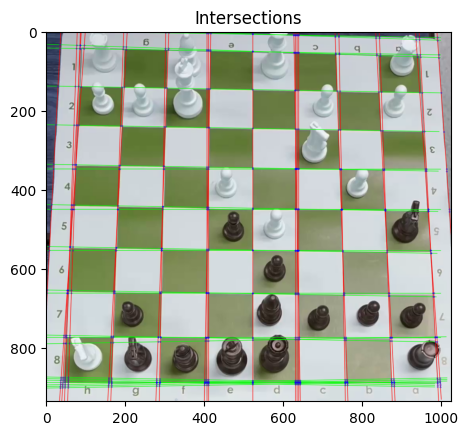

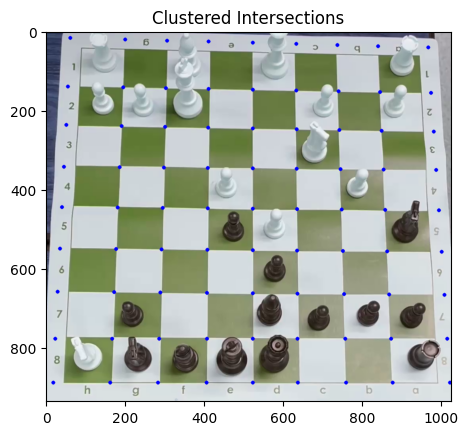

[[407.83, 662.5], [840.5, 38.12], [863.0, 557.5], [51.25, 237.5], [411.0, 146.0], [23.75, 778.33], [1015.5, 778.33], [523.0, 449.5], [740.5, 152.0], [636.5, 778.33], [981.25, 254.5], [181.75, 446.5], [61.97, 17.66], [306.38, 24.0], [40.31, 445.25], [406.57, 889.0], [633.12, 32.5], [748.0, 451.5], [1022.86, 889.18], [987.75, 351.75], [177.25, 551.5], [1001.25, 558.75], [523.0, 347.5], [301.0, 242.0], [283.86, 889.0], [636.0, 664.5], [55.88, 140.12], [849.5, 252.0], [873.0, 778.33], [18.16, 889.04], [967.31, 41.31], [877.71, 889.21], [35.12, 550.25], [634.5, 348.5], [45.56, 343.25], [29.69, 659.25], [292.5, 552.5], [737.0, 35.5], [411.5, 26.67], [523.0, 663.5], [974.5, 156.0], [523.0, 29.5], [994.25, 453.75], [1008.38, 667.75], [167.33, 778.33], [757.0, 778.33], [523.0, 246.0], [408.33, 553.5], [523.0, 778.33], [759.71, 889.0], [162.36, 889.0], [523.0, 889.0], [409.67, 346.5], [195.0, 142.0], [637.0, 889.0], [633.75, 150.0], [754.0, 665.5], [172.5, 660.5], [407.22, 778.33], [635.5, 555.5

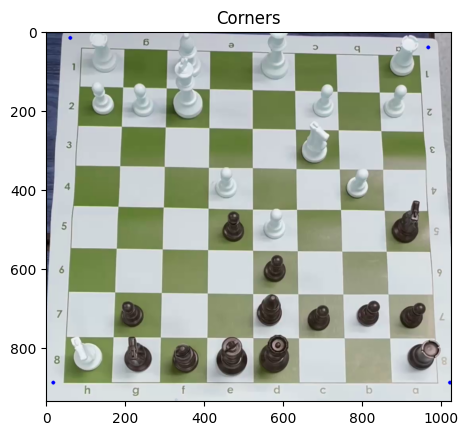

         x       y Possible_Cells
2    19.75   26.00       [(1, 1)]
40   25.00  116.00       [(2, 1)]
17   30.75  204.50       [(3, 1)]
56   35.75  290.50       [(4, 1)]
5    41.00  373.50       [(5, 1)]
..     ...     ...            ...
1   769.12  379.75       [(5, 9)]
62  772.00  210.67       [(3, 9)]
15  773.88  296.75       [(4, 9)]
38  777.33  122.67       [(2, 9)]
24  782.50   32.67       [(1, 9)]

[81 rows x 3 columns]
warped transform matrix: [[     1.0775    0.054173     -67.729]
 [  -0.033411       1.279     -20.517]
 [-3.3128e-05  0.00012648           1]]


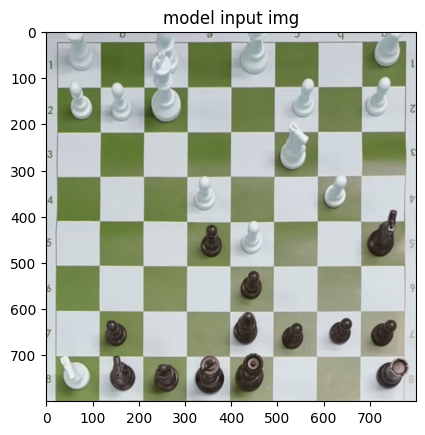


0: 640x640 1 black-bishop, 1 black-king, 2 black-knights, 8 black-pawns, 1 black-queen, 1 white-bishop, 1 white-king, 2 white-knights, 8 white-pawns, 2 white-rooks, 221.0ms
Speed: 5.8ms preprocess, 221.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
===========================0======================================
white-pawn 0.874583899974823
black-pawn 0.8718805909156799
white-pawn 0.8448571562767029
black-bishop 0.8445326685905457
white-knight 0.843926191329956
white-king 0.8408284187316895
black-pawn 0.8395788669586182
white-pawn 0.8381648063659668
black-pawn 0.8327086567878723
black-knight 0.8326854109764099
white-pawn 0.8221965432167053
black-pawn 0.820225179195404
black-pawn 0.8109483122825623
white-pawn 0.8059178590774536
black-pawn 0.7987431287765503
white-pawn 0.7964655160903931
black-pawn 0.7845099568367004
black-queen 0.7809633016586304
black-pawn 0.779191255569458
white-rook 0.7637494206428528
black-knight 0.7574595212936401
black-king 0.7553018927574

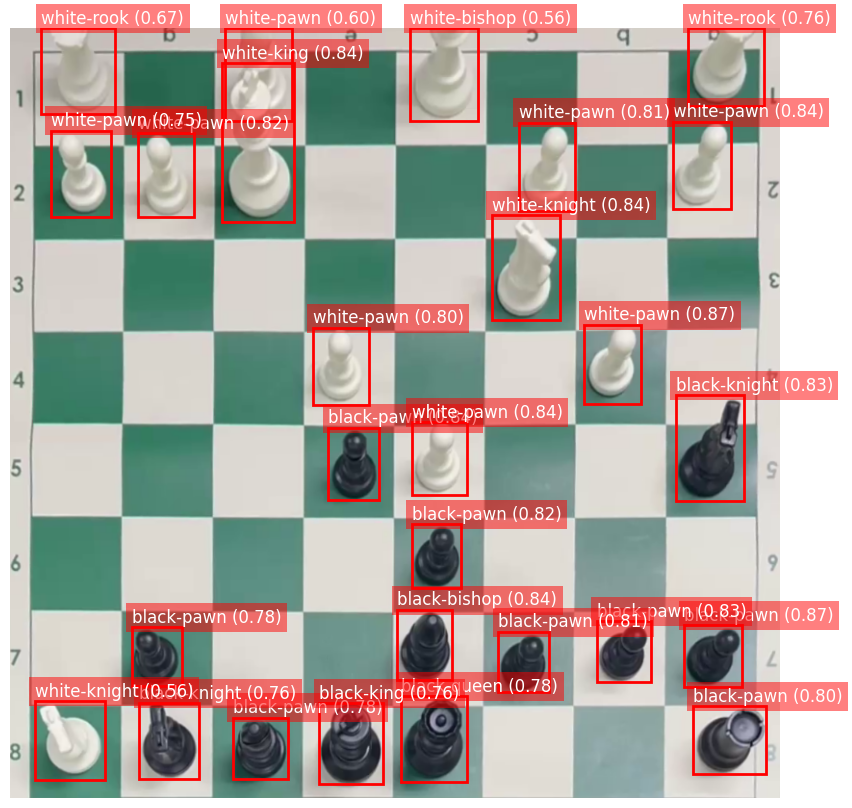

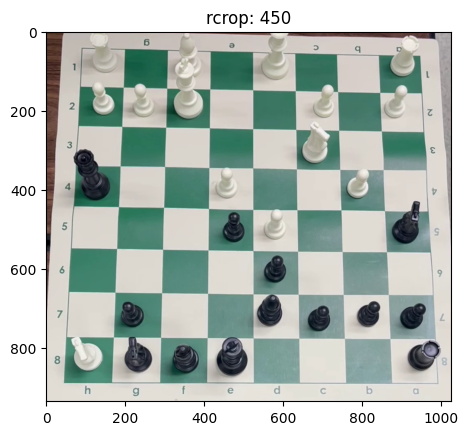

warped transform matrix: [[     1.0775    0.054173     -67.729]
 [  -0.033411       1.279     -20.517]
 [-3.3128e-05  0.00012648           1]]


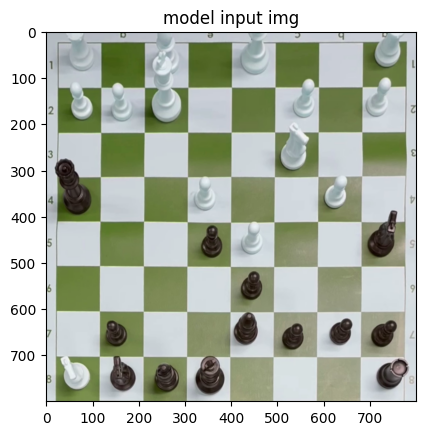


0: 640x640 1 black-bishop, 1 black-king, 2 black-knights, 8 black-pawns, 1 black-queen, 1 white-bishop, 1 white-king, 2 white-knights, 8 white-pawns, 2 white-rooks, 218.6ms
Speed: 5.2ms preprocess, 218.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
===========================450======================================
white-pawn 0.8803726434707642
white-pawn 0.8700140714645386
white-knight 0.8666027188301086
black-knight 0.8619741201400757
black-pawn 0.8549462556838989
black-bishop 0.8500314950942993
black-queen 0.8488011956214905
white-king 0.8475221395492554
black-pawn 0.8428400158882141
white-pawn 0.8352453708648682
black-pawn 0.8260894417762756
white-pawn 0.8197769522666931
black-pawn 0.8186740875244141
white-pawn 0.8158596158027649
white-rook 0.8040135502815247
black-pawn 0.8019744753837585
black-pawn 0.8007687330245972
black-knight 0.7916661500930786
white-pawn 0.7887957096099854
black-pawn 0.7549871802330017
white-rook 0.7532219290733337
black-pawn 0.7530510

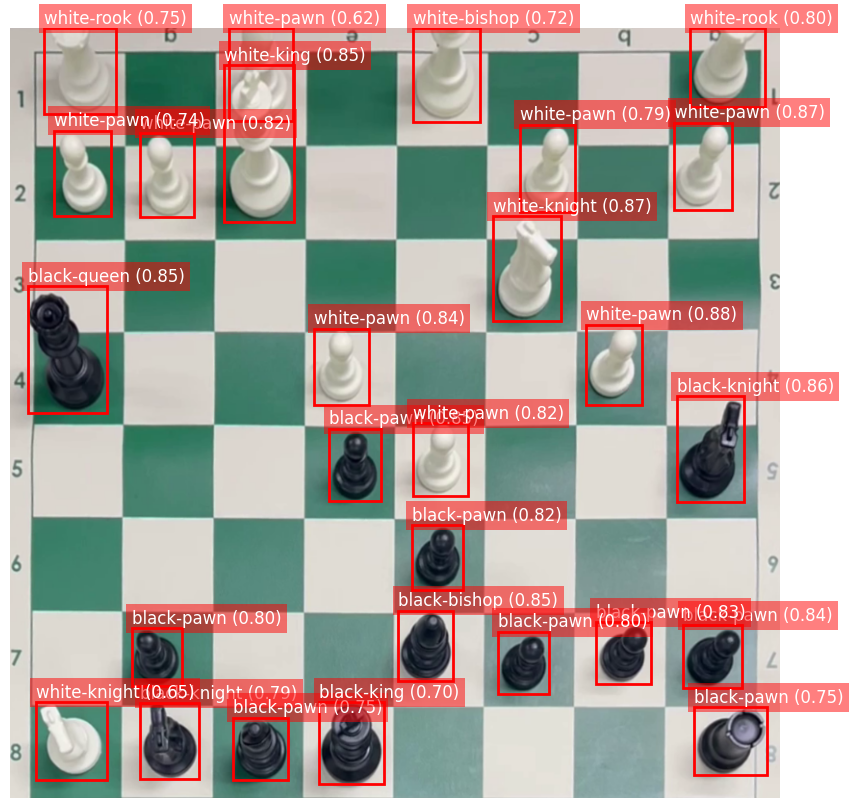

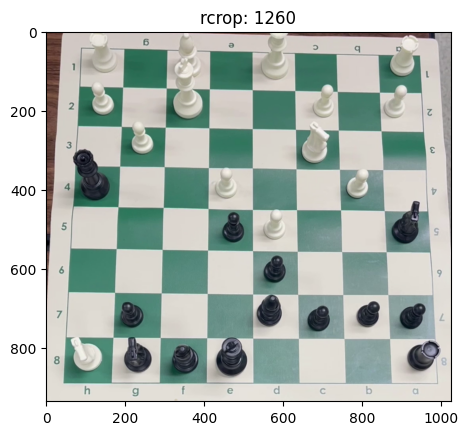

warped transform matrix: [[     1.0775    0.054173     -67.729]
 [  -0.033411       1.279     -20.517]
 [-3.3128e-05  0.00012648           1]]


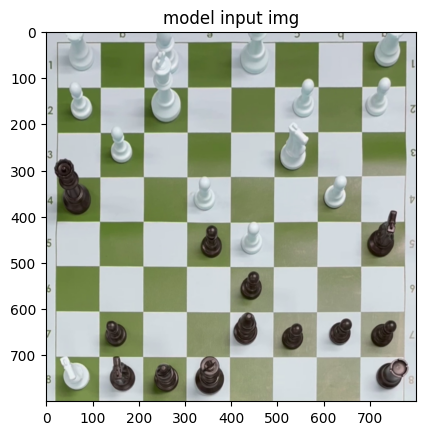


0: 640x640 3 black-bishops, 1 black-king, 2 black-knights, 8 black-pawns, 1 black-queen, 1 white-bishop, 1 white-king, 2 white-knights, 8 white-pawns, 2 white-rooks, 227.4ms
Speed: 7.2ms preprocess, 227.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
===========================1260======================================
black-pawn 0.8742635846138
white-pawn 0.8726767897605896
white-pawn 0.8691360354423523
white-knight 0.8669325709342957
black-knight 0.8539165258407593
black-pawn 0.8514026999473572
black-bishop 0.851081132888794
black-queen 0.8431620001792908
black-pawn 0.8423647284507751
white-king 0.8336997628211975
white-pawn 0.8324103951454163
white-pawn 0.8280016183853149
black-pawn 0.8210594654083252
white-pawn 0.8042705655097961
white-rook 0.8017365336418152
black-pawn 0.8010682463645935
black-knight 0.7880612015724182
black-pawn 0.7878725528717041
black-pawn 0.7656989693641663
black-pawn 0.7519994378089905
white-rook 0.749143123626709
white-pawn 0.7483994960

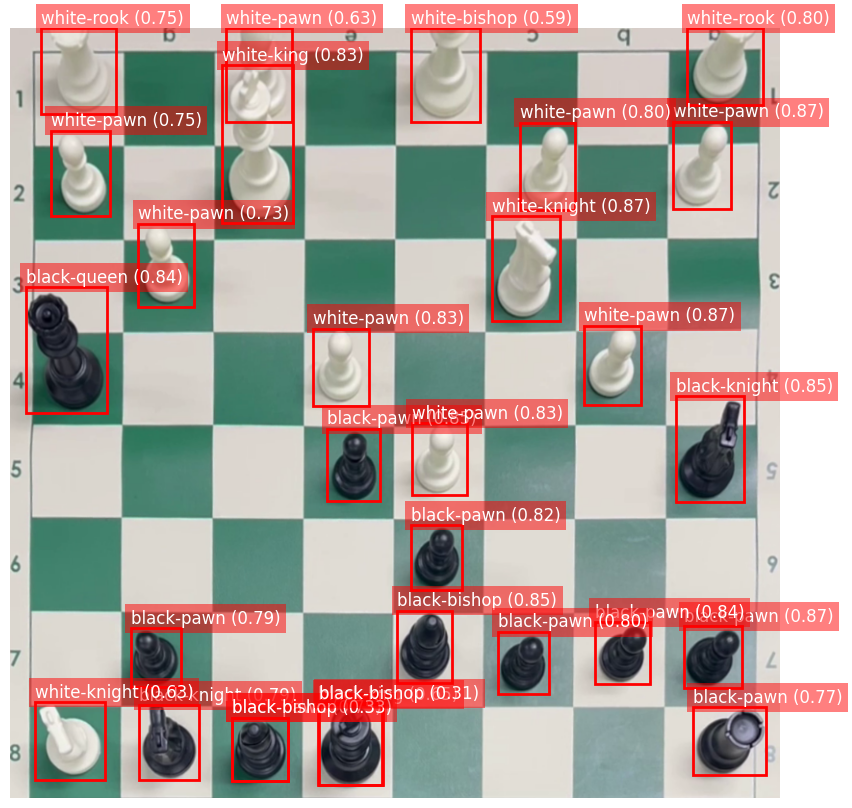

[[[9, 'white-pawn', 596, 308, 59, 82, 0.874583899974823],
  [3, 'black-pawn', 700, 620, 60, 64, 0.8718805909156799],
  [9, 'white-pawn', 688, 97, 61, 91, 0.8448571562767029],
  [0, 'black-bishop', 402, 604, 57, 73, 0.8445326685905457],
  [8, 'white-knight', 500, 194, 71, 109, 0.843926191329956],
  [7, 'white-king', 220, 36, 75, 165, 0.8408284187316895],
  [3, 'black-pawn', 330, 415, 53, 75, 0.8395788669586182],
  [9, 'white-pawn', 417, 409, 57, 76, 0.8381648063659668],
  [3, 'black-pawn', 609, 616, 56, 63, 0.8327086567878723],
  [2, 'black-knight', 691, 381, 71, 110, 0.8326854109764099],
  [9, 'white-pawn', 132, 109, 59, 87, 0.8221965432167053],
  [3, 'black-pawn', 417, 515, 51, 66, 0.820225179195404],
  [3, 'black-pawn', 507, 627, 52, 62, 0.8109483122825623],
  [9, 'white-pawn', 528, 98, 58, 92, 0.8059178590774536],
  [3, 'black-pawn', 709, 704, 76, 71, 0.7987431287765503],
  [9, 'white-pawn', 314, 311, 59, 80, 0.7964655160903931],
  [3, 'black-pawn', 231, 716, 57, 64, 0.7845099568367

In [ ]:
process_video('/content/Chess_project/2_move_student.mp4',frame_per_second=90,chess_model_path='/content/best-v8-copy.pt',hand_model_path='/content/Hand-yolo.pt',Debug=True)